In [45]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Funciones

In [46]:
def make_ring(N, K):
    # N: nodes, K: degree, avg connections per node
    # N: nodes 
    # K: neighbors, K//2 at left, K//2 at right

    # Make ring connectivity
    adj_list = []
    for ni in range(N):
        adj_list += [[]]
        for ki in range(1,K//2+1):
            adj_list[ni] += [ni-ki, ni+ki]

    adj_list = np.array([np.array(ai) for ai in adj_list])

    # Correct borders to create closed condtion
    pos = np.where(adj_list<0)
    adj_list[pos] = adj_list[pos] + N
    pos = np.where(adj_list>=N)
    adj_list[pos] = adj_list[pos] - N

    return adj_list

# Iniciar la foto

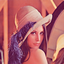

In [47]:
img = Image.open('./img/lenna.png')
img = img.resize((64,64), Image.LANCZOS)  # Use Image.LANCZOS instead of Image.ANTIALIAS
img

26 240


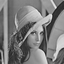

In [48]:
imggs = img.convert('L')
print(np.array(imggs).min(), np.array(imggs).max())
imggs

# threshold binarization

In [49]:
imbn = (np.array(imggs) > 128)*1
imbn, imbn.mean()

(array([[1, 1, 1, ..., 0, 0, 1],
        [1, 1, 1, ..., 1, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0]], shape=(64, 64)),
 np.float64(0.488037109375))

activity: 0.488037109375


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

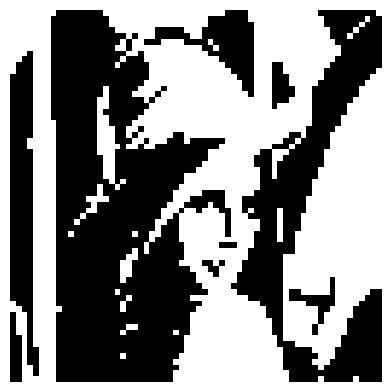

In [50]:
th_value = 128
imgbw = np.asarray(imggs)
imgbw = (imgbw > th_value)*1
imgbw = 1 - imgbw
plt.matshow(imgbw, cmap='Greys')
print('activity:', 1 - np.mean(imgbw))
lenna = imgbw.reshape(1, 64*64)*2-1
plt.axis('off')

(10, 4096)


(0.0, 1.1)

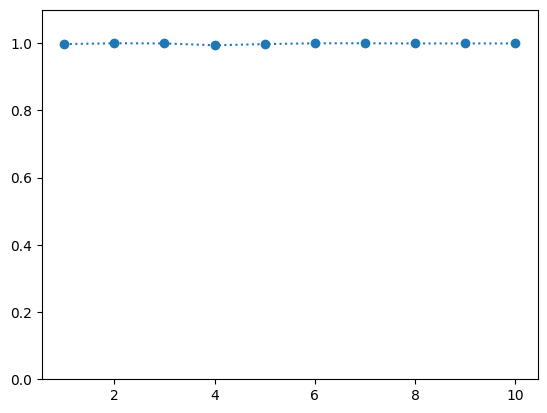

In [51]:
N = 64*64
K = 100
P = 10
# Learn P-1 pattern, 10th pattern is the image
X = np.random.randint(2, size=(P-1, N))*2-1
X = np.concatenate((X, lenna))  # this is the image, last pattern
print(np.shape(X))

# Generate network structure
C = make_ring(N, K)
# Start W=0
W = np.array([np.zeros(len(C[ni])) for ni in range(N)])
# Hebb learning
for xi in X:
    for ni in range(N):
        W[ni] += xi[C[ni]]*xi[ni]

time = 100
# M: final overlap for each pattern
# store m_i in M for each pattern
M = []
for xi in X:
    states = xi.copy()
    #update network
    m = [(states*xi).mean()]
    for ti in range(time):
        # update all neurons
        states = np.array([((states[C[ni]]*W[ni]).sum()>=0) for ni in range(N)])*2-1
        m += [(states*xi).mean()]
        if m[-2] == m[-1]:
            break
    M += [m[-1]]
plt.plot(range(1, P+1), np.abs(M), ':o')
plt.ylim(0,1.1)

((array([0]), array([385])), 16, 20)

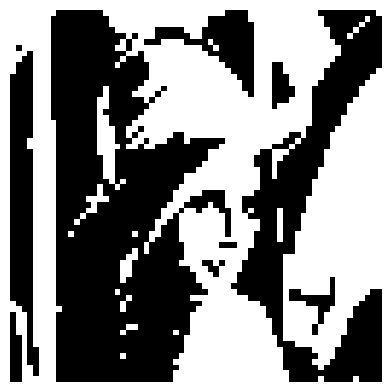

In [52]:
plt.matshow(states.reshape(64,64), cmap='Greys')
plt.axis('off')
np.where(states != lenna), 1044//64,  1044%64

# Ruido de la imagen

array([[-1, -1, -1, ..., -1,  1, -1],
       [-1, -1, -1, ..., -1,  1, -1],
       [-1,  1, -1, ...,  1,  1, -1],
       ...,
       [-1,  1,  1, ...,  1,  1,  1],
       [ 1,  1, -1, ...,  1,  1, -1],
       [-1,  1, -1, ..., -1,  1, -1]], shape=(64, 64))

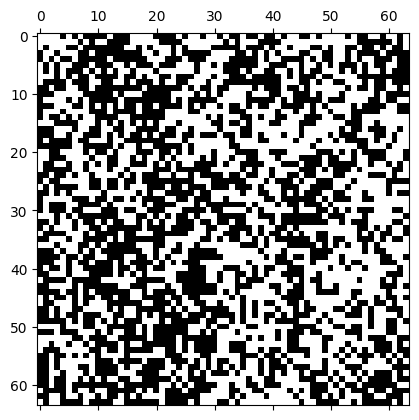

In [53]:
noise_level = 0.7

noisy_lenna = lenna.copy()

for i in range(np.shape(noisy_lenna)[1]):
    if np.random.random() < noise_level:
        noisy_lenna[0, i] = np.random.randint(2)*2 - 1

plt.matshow(noisy_lenna.reshape((64,64)), cmap='Greys')

noisy_lenna.reshape((64,64))

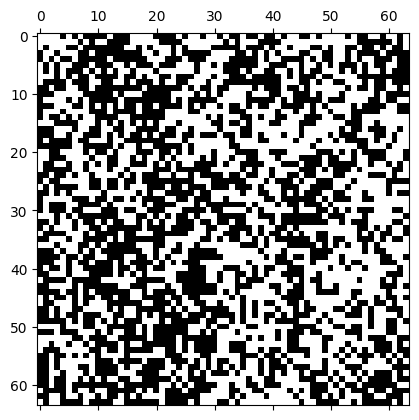

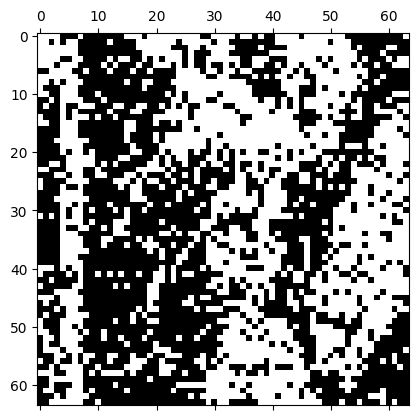

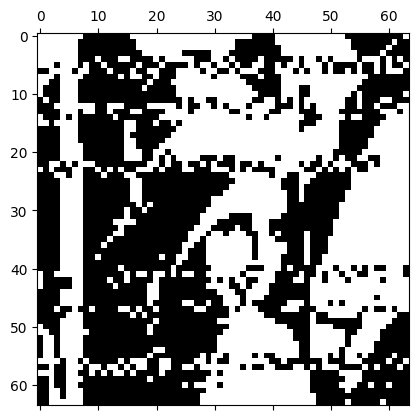

In [54]:
states = noisy_lenna.flatten()
#update network
m = [(states*X[-1]).mean()]

plt.matshow(states.reshape((64,64)), cmap='Greys')

time = 100
for ti in range(time):
    # update all neurons
    states = np.array([((states[C[ni]]*W[ni]).sum()>=0) for ni in range(N)])*2-1
    if not (ti % 50):
        plt.matshow(states.reshape((64,64)), cmap='Greys')
    m += [(states*X[-1]).mean()]

# Aprendizaje de la imagen:

([<matplotlib.lines.Line2D at 0x1c9caebcb60>], np.float64(0.81591796875))

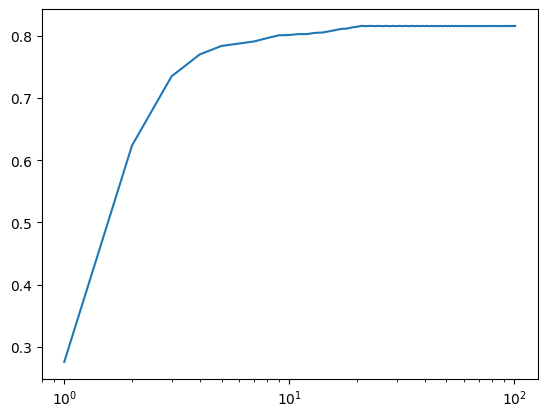

In [55]:
plt.semilogx(range(1, len(m)+1), m), m[-1]

# Rostro de lena

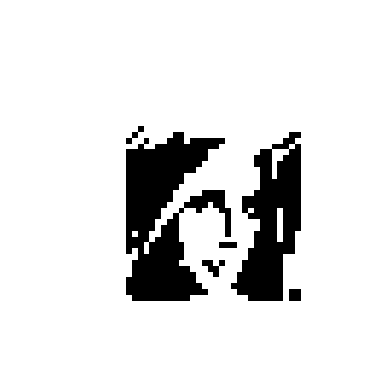

In [56]:
lenna_rostro = np.zeros((64,64), dtype='int')

lenna_rostro[20:50,20:50] = imgbw[20:50,20:50]

plt.matshow(lenna_rostro, cmap='Greys')
a = plt.axis('off')

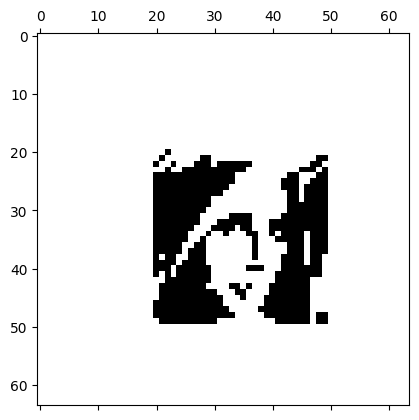

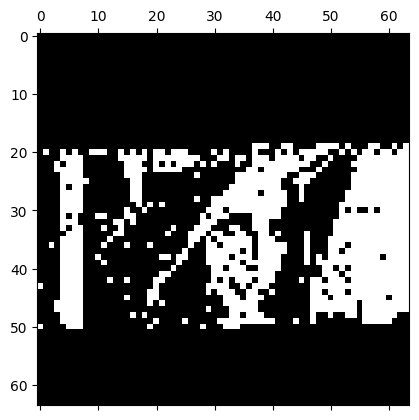

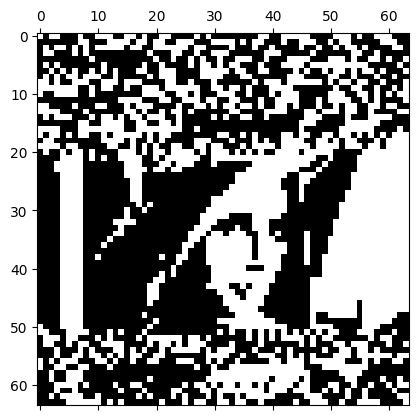

In [57]:
states = lenna_rostro.flatten()
#update network
m = [(states*X[-1]).mean()]
activity = [states.mean()]

plt.matshow(states.reshape((64,64)), cmap='Greys')

time = 100
for ti in range(time):
    # update all neurons
    states = np.array([((states[C[ni]]*W[ni]).sum()>=0) for ni in range(N)])*2-1
    if not (ti % 50):
        plt.matshow(states.reshape((64,64)), cmap='Greys')
    m += [(states*X[-1]).mean()]
    activity += [states.mean()]

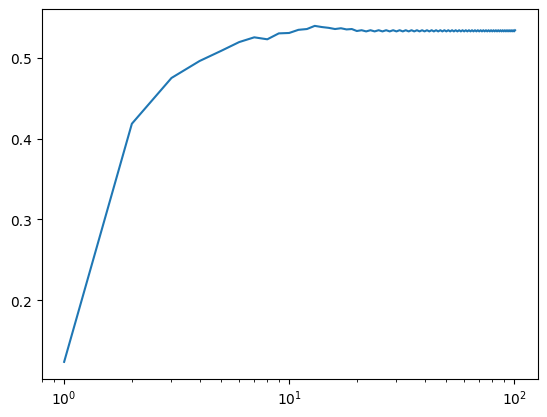

In [58]:
plt.semilogx(range(1, len(m)+1), m)

# Poner el rostro de lena para que revise igual arriba

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

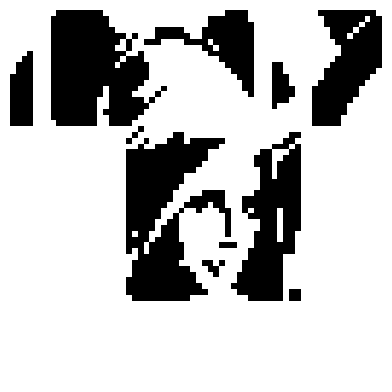

In [59]:
lenna_rostro = np.zeros((64,64), dtype='int')

# Incluir el rostro de Lena
lenna_rostro[20:50, 20:50] = imgbw[20:50, 20:50]

# Incluir la parte superior de la imagen (por ejemplo, las primeras 20 filas)
lenna_rostro[0:20, :] = imgbw[0:20, :]

plt.matshow(lenna_rostro, cmap='Greys')
plt.axis('off')

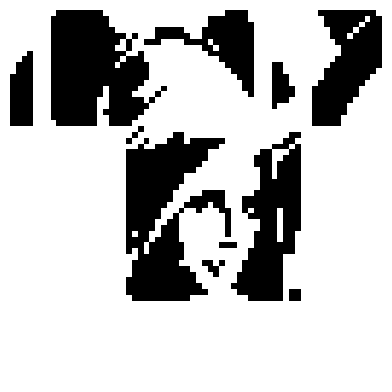

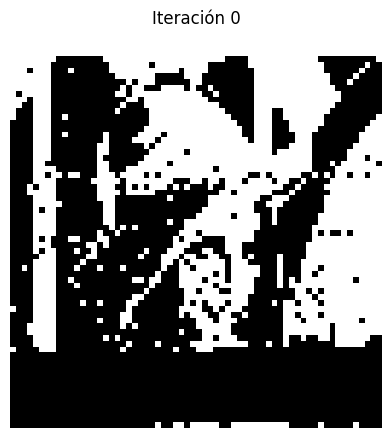

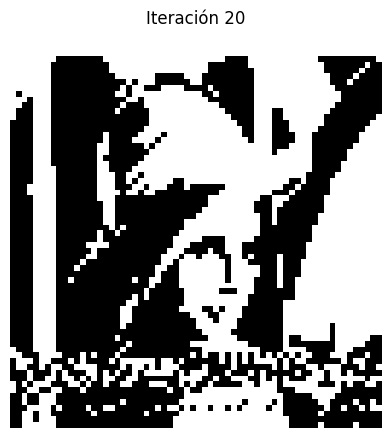

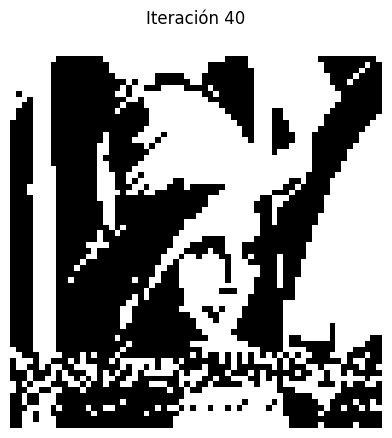

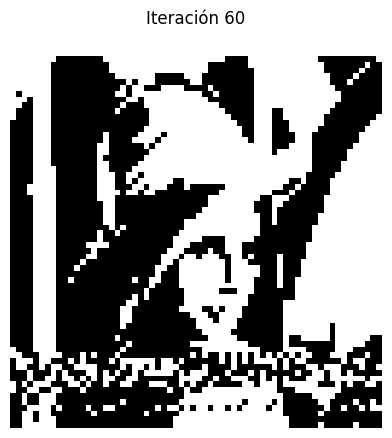

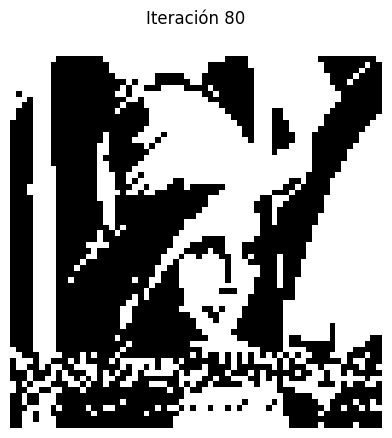

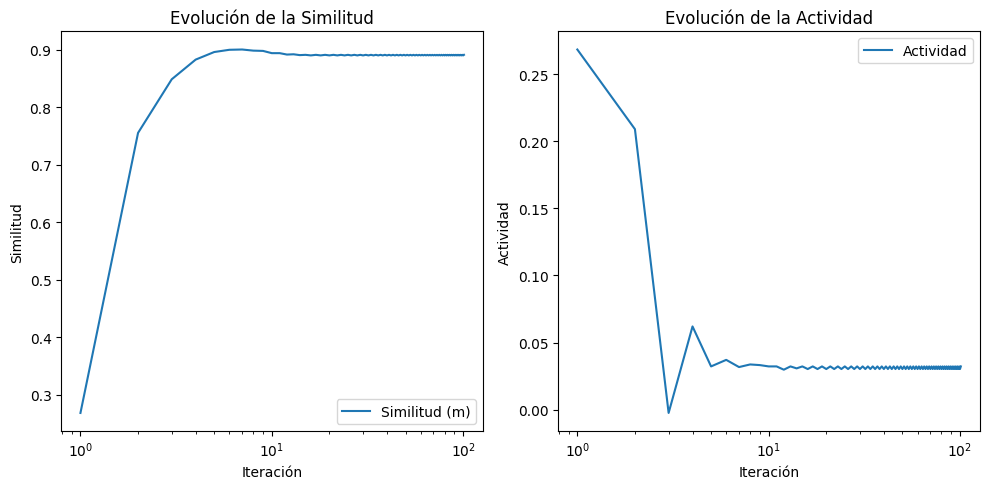

In [60]:
states = lenna_rostro.flatten()
m = [(states * X[-1]).mean()]  # Similaridad inicial con el patrón aprendido
activity = [states.mean()]  # Actividad inicial de los estados

plt.matshow(states.reshape((64, 64)), cmap='Greys')
plt.axis('off')

time = 100
for ti in range(time):
    # Actualizar todos los estados de las neuronas
    states = np.array([((states[C[ni]] * W[ni]).sum() >= 0) for ni in range(N)]) * 2 - 1
    
    # Graficar cada 20 iteraciones para observar el progreso
    if ti % 20 == 0:
        plt.matshow(states.reshape((64, 64)), cmap='Greys')
        plt.title(f"Iteración {ti}")
        plt.axis('off')
    
    # Registrar la evolución de la similitud y la actividad
    m.append((states * X[-1]).mean())
    activity.append(states.mean())

# Graficar la evolución de la similitud (m) y la actividad
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.semilogx(range(1, len(m) + 1), m, label='Similitud (m)')
plt.xlabel('Iteración')
plt.ylabel('Similitud')
plt.title('Evolución de la Similitud')
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(range(1, len(activity) + 1), activity, label='Actividad')
plt.xlabel('Iteración')
plt.ylabel('Actividad')
plt.title('Evolución de la Actividad')
plt.legend()

plt.tight_layout()
plt.show()

# Poner que aprenda la parte de abajo del rostro

(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

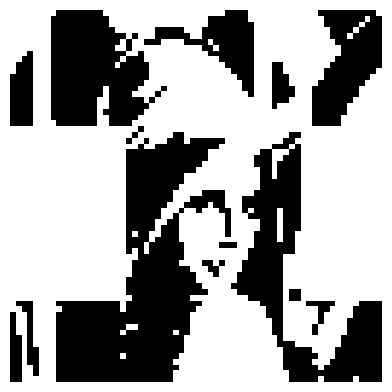

In [61]:
lenna_rostro = np.zeros((64, 64), dtype='int')

# Incluir el rostro de Lena
lenna_rostro[20:50, 20:50] = imgbw[20:50, 20:50]

# Incluir la parte superior de la imagen (primeras 20 filas)
lenna_rostro[0:20, :] = imgbw[0:20, :]

# Incluir la parte inferior de la imagen (últimas 14 filas)
lenna_rostro[50:64, :] = imgbw[50:64, :]

# Visualizar la nueva imagen con las regiones aprendidas
plt.matshow(lenna_rostro, cmap='Greys')
plt.axis('off')

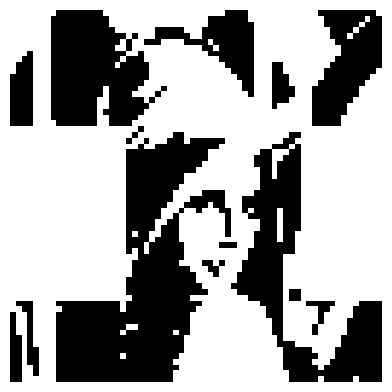

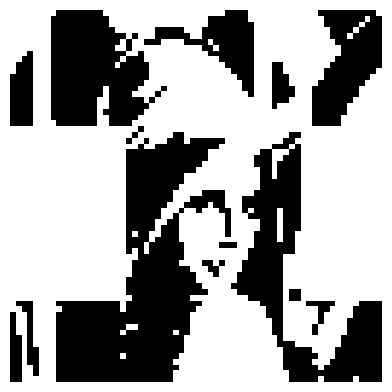

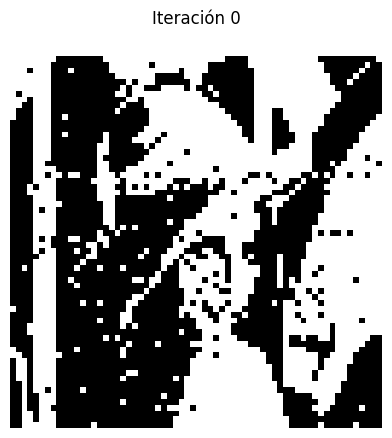

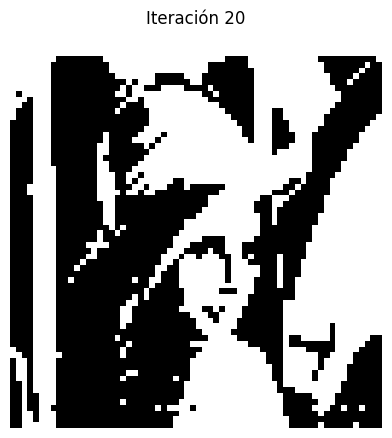

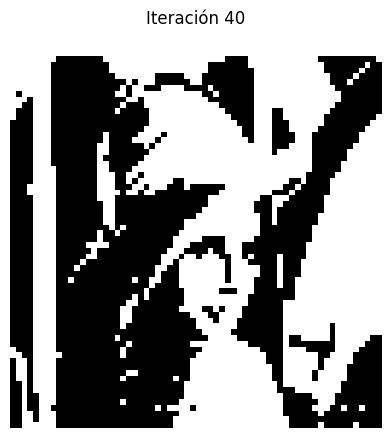

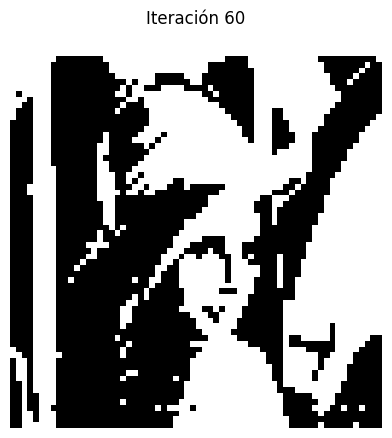

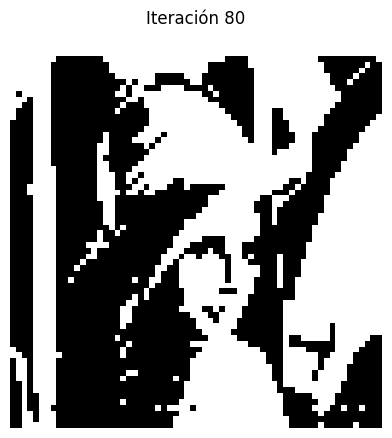

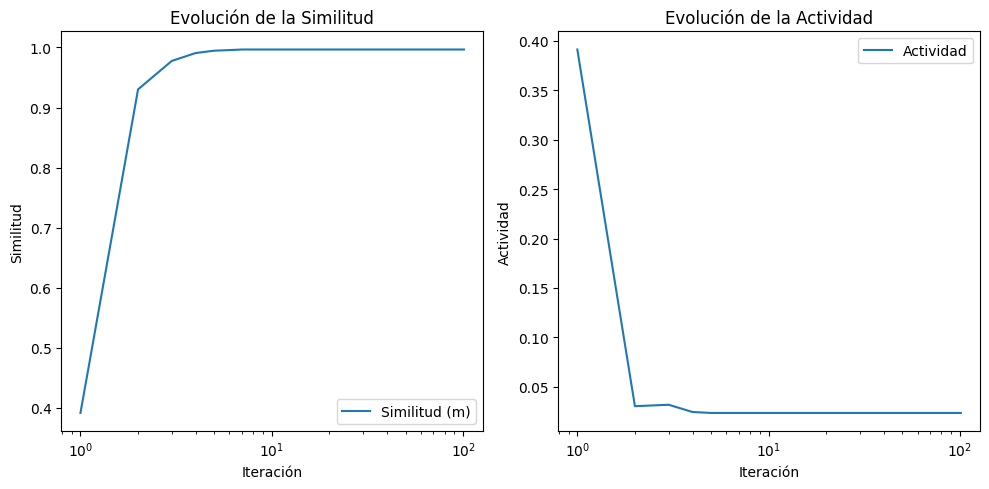

In [62]:
lenna_rostro = np.zeros((64, 64), dtype='int')

# Incluir el rostro de Lena
lenna_rostro[20:50, 20:50] = imgbw[20:50, 20:50]

# Incluir la parte superior de la imagen (primeras 20 filas)
lenna_rostro[0:20, :] = imgbw[0:20, :]

# Incluir la parte inferior de la imagen (últimas 14 filas)
lenna_rostro[50:64, :] = imgbw[50:64, :]

# Visualizar la nueva imagen con las regiones aprendidas
plt.matshow(lenna_rostro, cmap='Greys')
plt.axis('off')

# Inicializar los estados y métricas
states = lenna_rostro.flatten()
m = [(states * X[-1]).mean()]  # Similaridad inicial con el patrón aprendido
activity = [states.mean()]  # Actividad inicial de los estados

plt.matshow(states.reshape((64, 64)), cmap='Greys')
plt.axis('off')

# Iterar para actualizar los estados
time = 100
for ti in range(time):
    # Actualizar todos los estados de las neuronas
    states = np.array([((states[C[ni]] * W[ni]).sum() >= 0) for ni in range(N)]) * 2 - 1
    
    # Graficar cada 20 iteraciones para observar el progreso
    if ti % 20 == 0:
        plt.matshow(states.reshape((64, 64)), cmap='Greys')
        plt.title(f"Iteración {ti}")
        plt.axis('off')
    
    # Registrar la evolución de la similitud y la actividad
    m.append((states * X[-1]).mean())
    activity.append(states.mean())

# Graficar la evolución de la similitud (m) y la actividad
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.semilogx(range(1, len(m) + 1), m, label='Similitud (m)')
plt.xlabel('Iteración')
plt.ylabel('Similitud')
plt.title('Evolución de la Similitud')
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(range(1, len(activity) + 1), activity, label='Actividad')
plt.xlabel('Iteración')
plt.ylabel('Actividad')
plt.title('Evolución de la Actividad')
plt.legend()

plt.tight_layout()
plt.show()